In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

In [31]:
data=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')

In [32]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [33]:
data.dropna(inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [35]:
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [36]:
basket = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
         )
basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
frequent_itemsets = apriori(basket_sets, min_support=0.020, use_colnames=True)

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
frequent_itemsets

,support,itemsets
0,0.034934,( SPACEBOY BABY GIFT SET)
1,0.026201,(10 COLOUR SPACEBOY PEN)
2,0.030568,(3 PIECE SPACEBOY COOKIE CUTTER SET)
3,0.039301,(36 PENCILS TUBE RED RETROSPOT)
4,0.061135,(4 TRADITIONAL SPINNING TOPS)
...,...,...
1299,0.024017,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU..."
1300,0.021834,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ..."
1301,0.024017,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ..."
1302,0.024017,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ..."


In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10 COLOUR SPACEBOY PEN),(POSTAGE),0.026201,0.655022,0.026201,1.000000,1.526667,0.009039,inf,0.354260
1,(POSTAGE),(10 COLOUR SPACEBOY PEN),0.655022,0.026201,0.026201,0.040000,1.526667,0.009039,1.014374,1.000000
2,(3 PIECE SPACEBOY COOKIE CUTTER SET),(POSTAGE),0.030568,0.655022,0.028384,0.928571,1.417619,0.008362,4.829694,0.303881
3,(POSTAGE),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.655022,0.030568,0.028384,0.043333,1.417619,0.008362,1.013344,0.853944
4,(4 TRADITIONAL SPINNING TOPS),(MINI PAINT SET VINTAGE ),0.061135,0.089520,0.024017,0.392857,4.388502,0.018545,1.499615,0.822410


In [41]:
rules[(rules['lift'] >= 3) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.026201,0.082969,0.021834,0.833333,10.043860,0.019660,5.502183,0.924664
13,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.037118,0.082969,0.028384,0.764706,9.216718,0.025305,3.897380,0.925868
14,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.082969,0.087336,0.063319,0.763158,8.738158,0.056073,3.853469,0.965681
15,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.087336,0.082969,0.063319,0.725000,8.738158,0.056073,3.334657,0.970302
16,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.082969,0.080786,0.067686,0.815789,10.098151,0.060983,4.990019,0.982488
...,...,...,...,...,...,...,...,...,...,...
6354,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...","(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ...",0.037118,0.024017,0.021834,0.588235,24.491979,0.020943,2.370243,0.996145
6355,"(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF ...","(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ...",0.037118,0.028384,0.021834,0.588235,20.723982,0.020780,2.359638,0.988435
6356,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...","(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ...",0.034934,0.021834,0.021834,0.625000,28.625000,0.021071,2.608443,1.000000
6357,"(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF ...","(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, PACK ...",0.030568,0.024017,0.021834,0.714286,29.740260,0.021100,3.415939,0.996847


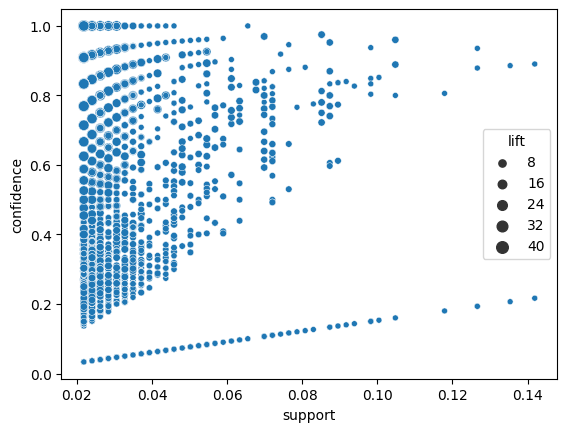

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()